# WER - Open Mini-Challenge

## Was ist der Anteil Elektroautos im Verkauf in der Schweiz in 2030?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

### Anteil Elektroautos
Wir haben die Daten von 2018 - 2021 herausgesucht und daraus ein linearer Trend bis 2030 aufgestellt. Laut Trend wird der Anteil E-Autos in 2030 bei 44.20% liegen. Das Ergebnis wird sich noch durch unsere Zufallsvariablen, die wir weiter unten definiert haben, ändern.

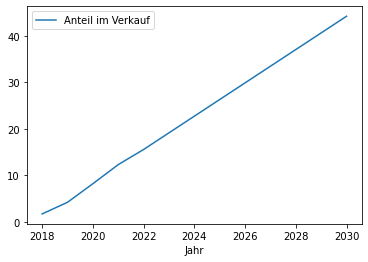

In [2]:
df_anteil = pd.read_csv("Anteil_E_Autos.csv")
df_anteil.plot(x="Jahr", y="Anteil im Verkauf")
plt.show()

In [3]:
df_anteil

,Jahr,Anteil im Verkauf
0,2018,1.70
1,2019,4.20
2,2020,8.20
3,2021,12.30
4,2022,15.55
5,2023,19.13
6,2024,22.71
7,2025,26.29
8,2026,29.87
9,2027,33.45


### Reichweite
Als Zufallsvariable haben wir die 10 Elektroautos mit der grössten Reichweite der letzten 4 Jahre rausgesucht und dazu ein Diagramm aufgestellt. 

In [60]:
df_reichw = pd.read_csv("Reichweiten.csv")
df_reichw

,Rang,2021,2020,2019,2018
0,1,785,663,610,610
1,2,663,580,560,560
2,3,630,565,505,505
3,4,610,550,470,415
4,5,591,480,463,450
5,6,580,471,455,400
6,7,560,470,450,380
7,8,550,455,450,300
8,9,540,450,423,280
9,10,536,446,411,270


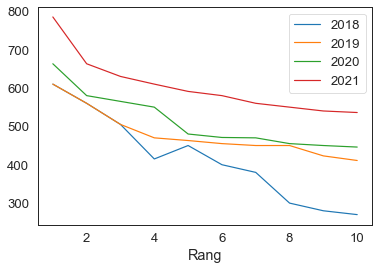

In [61]:
df_reichw.plot(x="Rang", y=["2018", "2019", "2020", "2021"])
plt.show()

Anhand dieses Diagrammes sieht man, dass die Top 10 E-Autos nach Reichweite immer steigen. Das 10. Auto (Rang 10) war in 2018 bei ungefähr 270km und in 2021 bei 536km.

Jetzt müssen wir die Werte für die unbekannten Jahre ausrechnen (2022 - 2030):
Für jedes Jahr müssen folgende Werte berechnet werden:
- Erwartungswert
- Sigma
- COV (S / E)

In [6]:
# Ergibt normierte Standardabweichung
def calc_cov(mittelwert, sigma):
    return sigma / mittelwert

In [63]:
# Vorhandene Erwartungswerte in eienr Liste hinzufügen
mit_reichw = []
mit_reichw.append(np.mean(df_reichw["2018"]))
mit_reichw.append(np.mean(df_reichw["2019"]))
mit_reichw.append(np.mean(df_reichw["2020"]))
mit_reichw.append(np.mean(df_reichw["2021"]))

# Standardabweichungen für jedes Jahr berechnen und in einer Liste hinzufügen
stab_reichw = []
stab_reichw.append(np.std(df_reichw["2018"]))
stab_reichw.append(np.std(df_reichw["2019"]))
stab_reichw.append(np.std(df_reichw["2020"]))
stab_reichw.append(np.std(df_reichw["2021"]))

# Variationskoeffizient berechnen
cov_reichw = [calc_cov(mit_reichw[i], stab_reichw[i]) for i in range(4)]

# Durchschnitt Variationskoeffizient:
mit_cov_reichw = np.mean(cov_reichw)
print("Mittelwert cov: {}".format(mit_cov_reichw))

Mittelwert cov: 0.16024008921631805


In [9]:
# In Excel ausgerechnete Mittelwerte für die unbekannten Jahre 2022 - 2030 (TREND)
mit_reichw_neu = [653.0, 712.7, 772.4, 832.1, 891.8, 951.5, 1011.2, 1070.9, 1130.6]

# Standardabweichungen für die unbekannten Jahre
stab_reichw_neu = [i * mit_cov_reichw for i in mit_reichw_neu]

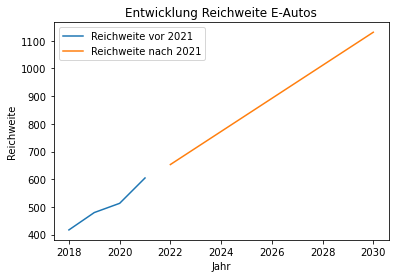

In [10]:
jahren_vor = list(range(2018, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_reichw, label = "Reichweite vor 2021")
plt.plot(jahren_nach, mit_reichw_neu, label = "Reichweite nach 2021")
plt.xlabel('Jahr')
plt.ylabel('Reichweite')
plt.title('Entwicklung Reichweite E-Autos')
plt.legend(loc="upper left")
plt.show()

Anhand des Diagramms sieht man, wie die Reichweite linear steigt. Bei 2030 bei ca. 1130km. Da wir 2 verschiedene Listen für den Plot gebraucht haben, gibt es zwischen 2021 und 2022 eine Lücke.

#### Reichweite 2021 - Wahrscheinlichkeitsverteilung  

In [7]:
# Funktion für die Wahrscheinlichkeitsverteilung
def plot_distr(dataframe, x_val):
    sns.set_style('white')
    sns.set_context("paper", font_scale = 1.5)
    sns.displot(data = dataframe, x = x_val, kind = "hist", bins = 150, aspect = 3.0)   

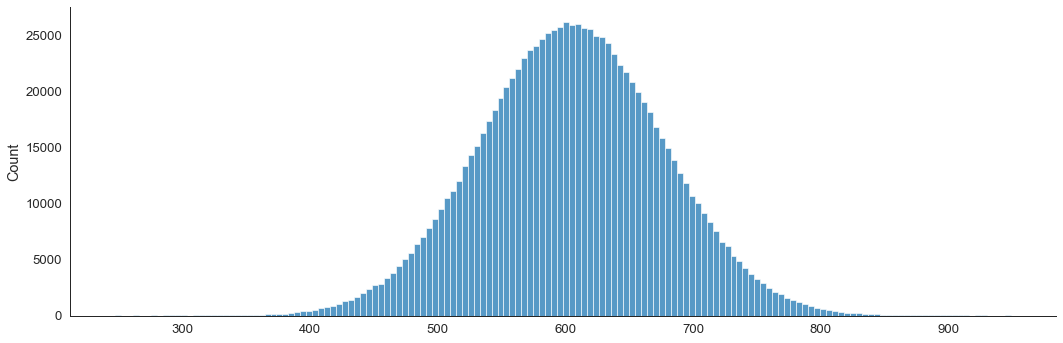

In [11]:
reichw_2021 = mit_reichw[3]
stab_reichw_2021 = stab_reichw[3]

sim_reichweite = np.random.normal(reichw_2021, stab_reichw_2021, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

#### Reichweite 2030 - Wahrscheinlichkeitsverteilung 

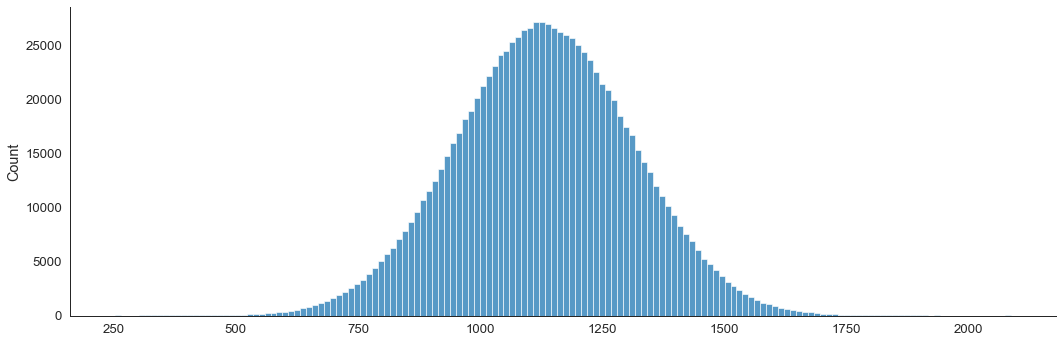

In [12]:
reichw_2030 = mit_reichw_neu[-1]
stab_reichw_2030 = stab_reichw_neu[-1]

sim_reichweite = np.random.normal(reichw_2030, stab_reichw_2030, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

**Delta Reichweite 2021 - 2030**

In [130]:
delta_reichw = reichw_2030 - reichw_2021
print(delta_reichw)

526.0999999999999


### Antriebskosten

Als nächste Zufallsvariable berechnen wir die Antriebskosten. Diese haben einen geopolitischen Einfluss und dadurch entsteht eine Unsicherheit (Aleatorisch).

In [64]:
df_antriebkosten = pd.read_csv("Antriebkosten.csv")
df_antriebkosten

,Jahr,Bleifrei(95),Bleifrei(98),Diesel,KWH
0,2010,1.640,1.69,1.72,0.2400
1,2011,1.730,1.78,1.86,0.2416
2,2012,1.810,1.86,1.93,0.2318
3,2013,1.770,1.83,1.89,0.2295
4,2014,1.720,1.78,1.82,0.2312
5,2015,1.490,1.56,1.55,0.2370
6,2016,1.410,1.48,1.45,0.2379
7,2017,1.510,1.59,1.58,0.2378
8,2018,1.630,1.72,1.74,0.2430
9,2019,1.600,1.69,1.74,0.2443


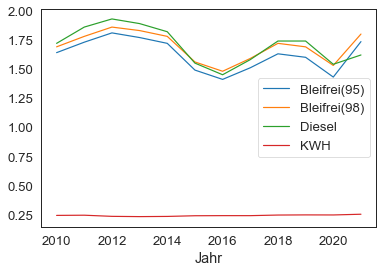

In [65]:
df_antriebkosten.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

Im Plot sieht man die Entwicklung der Preise pro Liter resp. Preise pro kWh. Wir gehen davon aus, dass die E-Autos zuhause geladen werden. Dieser Preis liegt heutzutage bei 0.24.- pro kWh.

**Antriebkosten (2010 - 2030)**

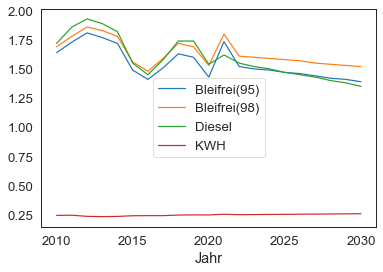

In [66]:
df_antriebkosten_trend = pd.read_csv("Antriebkosten_Trend.csv")
df_antriebkosten_trend.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

Für Benzin bestimmen wir den Variationskoeffizienten bei 0.2. Dann unterteilen wir die Daten in 2 Listen (1. vor 2021, 2. nach 2021)

In [18]:
mit_cov_antrieb = 0.2
mit_bleifrei = []
mit_bleifrei_neu = []

for i in range(len(df_antriebkosten_trend["Bleifrei(95)"])):
    # Werte von 2010 - 2021 zu einer Liste hinzufügen
    if i <= 11:
        mit_bleifrei.append(df_antriebkosten_trend["Bleifrei(95)"][i])
    # Werte von 2022 - 2030 zu einer Liste hinzufügen
    else:
        mit_bleifrei_neu.append(df_antriebkosten_trend["Bleifrei(95)"][i])

Für die Extrapolation reicht es wenn wir nur einebn Kraftstoff nehmen, weil sie alle etwa die gleiche Entwicklung aufzegen. Wir entscheiden uns für **Bleifrei 95**

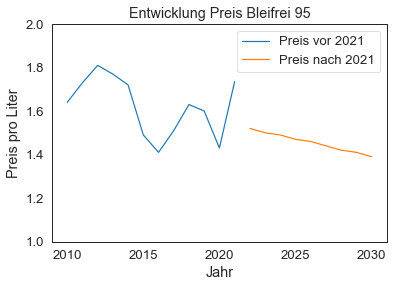

In [19]:
jahren_vor = list(range(2010, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_bleifrei, label = "Preis vor 2021")
plt.plot(jahren_nach, mit_bleifrei_neu, label = "Preis nach 2021")
plt.xlabel("Jahr")
plt.ylabel("Preis pro Liter")
plt.title("Entwicklung Preis Bleifrei 95")
plt.legend(loc="upper right")
plt.ylim(1, 2)
plt.show()

Anhand des Diagramms sieht man, wie der Preis des Kraftstoffes ab 2021 linear sinkt. Da wir 2 verschiedene Listen für den Plot gebraucht haben, gibt es zwischen 2021 und 2022 eine Lücke.

#### Antriebskosten 2021 - Wahrscheinlichkeitsverteilung 

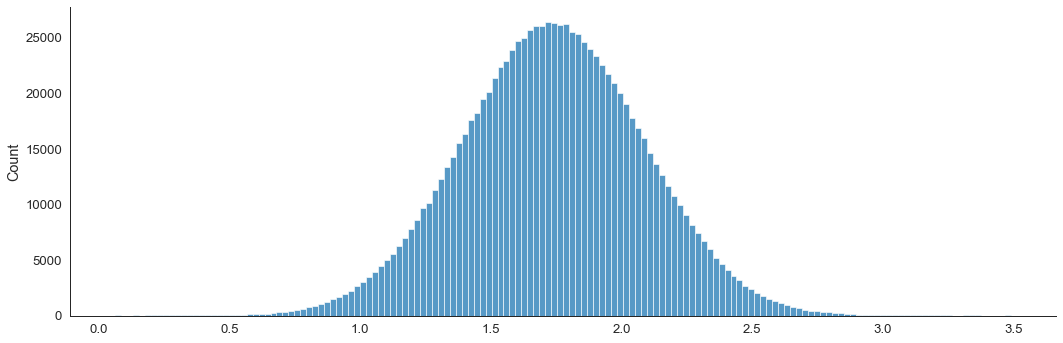

In [20]:
mu_bleifrei_2021 = mit_bleifrei[11]
stab_bleifrei_2021 = mu_bleifrei_2021 * mit_cov_antrieb

sim_bleifrei_2021 = np.random.normal(mu_bleifrei_2021, stab_bleifrei_2021, 1_000_000)
df_sim_bleifrei_2021 = pd.DataFrame(sim_bleifrei_2021)
plot_distr(df_sim_bleifrei_2021, sim_bleifrei_2021)

#### Antriebskosten 2030 - Wahrscheinlichkeitsverteilung 

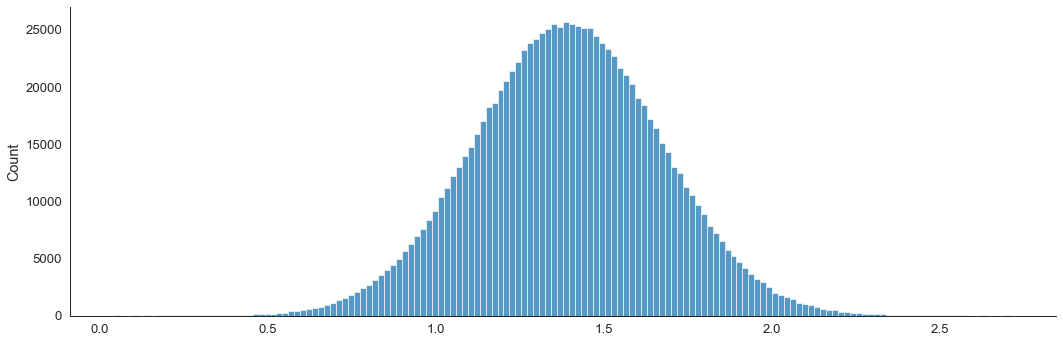

In [21]:
mu_bleifrei_2030 = mit_bleifrei_neu[-1]
stab_bleifrei_2030 = mu_bleifrei_2030 * mit_cov_antrieb

sim_bleifrei_2030 = np.random.normal(mu_bleifrei_2030, stab_bleifrei_2030, 1_000_000)
df_sim_bleifrei_2030 = pd.DataFrame(sim_bleifrei_2030)
plot_distr(df_sim_bleifrei_2030, sim_bleifrei_2030)

**Delta Antriebskosten 2021 - 2030**

In [131]:
delta_bleifrei_2030 = mu_bleifrei_2021 - mu_bleifrei_2030
print(delta_bleifrei_2030)

0.3450000000000002


### Preis Elektro relativ zu Benzin / Diesel
Für diesen Vergleich haben wir 8 identische Autos genommen, die es als Elektro und Verbrenner gibt.

In [69]:
df_auto_preise = pd.read_csv("Autopreise_e_vs_v.csv")
df_auto_preise

,Auto,Elektro Preis,Verbrenner Preis
0,BMW i4,69900,56400
1,Mini Cooper,37900,26000
2,Opel Corsa,35000,19000
3,Opel Grandland,44260,32450
4,Opel Mokka,36200,26200
5,Opel Combo Life,40800,26460
6,Peugeot 208,33000,18500
7,Volvo xc40,59500,36840


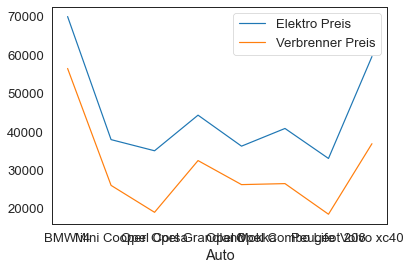

In [70]:
df_auto_preise.plot(x="Auto", y=["Elektro Preis", "Verbrenner Preis"])
plt.show()

In [72]:
mit_e_preis = np.mean(df_auto_preise["Elektro Preis"])
mit_v_preis = np.mean(df_auto_preise["Verbrenner Preis"])

print("Mittelwert Elektro: {}".format(mit_e_preis))
print("Mittelwert Verbrenner: {}".format(mit_v_preis))

Mittelwert Elektro: 44570.0
Mittelwert Verbrenner: 30231.25


Anhand der Daten sieht man, dass der Preisunterschied zwischen Elektro - und Verbrennerautos konstant ca. CHF 10'000 beträgt . Dies war bereits in der Vergangenheit der Fall. Daher gehen wir davon aus, dass sich das auch in Zukunft nicht ändern wird und rechnen mit CHF 10'000 Unterschied. Die Subventionen und günstigeren Batterien rechnen wir erst später mit dazu.

### Batteriekosten

Vor zehn Jahren galt ein Elektroauto noch als unbezahlbar. Damals kostete die Kilowattstunde (kWh) einer Lithium-Ionen-Batterie 1100 Franken. Seitdem sind die Preise in einem rasanten Tempo gefallen: um mehr als 89 Prozent auf 137 Franken pro kWh in 2020.


Noch dazu sammelten wir folgende Daten der Swiss E-Mobility:
- Akkupreis seit Anfang Jahrzehnt um 87% gesunken
- wird noch bis 2025 halbieren

Somit konnten wir schnell feststellen, dass die Entwicklung der Batteriekosten exponential abnehmen.

In [22]:
# Funktion für die exponentielle Funktion
def plot_expon(func, x_range):
    x = np.arange(*x_range)
    y = func(x)
    plt.title("Entwicklung Batteriekosten")
    plt.xlabel("5-Jahren Abschnitte")
    plt.ylabel("Preis")
    plt.plot(x, y)
    return y

Wir behaupten, dass sich die Preise bis 2030 nochmals halbieren werden, demendsprechend von 68.5 in 2025 auf 34.25.
Exponent 0.5

Batteriekosten im Jahr 2030: CHF 34.25


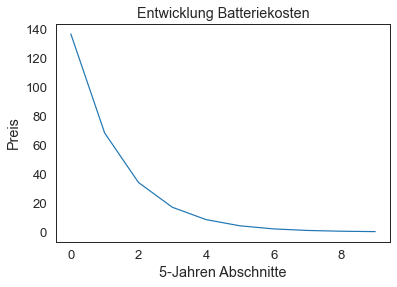

In [23]:
kwh_2020 = 137
exponent = 0.5

y_werte = plot_expon(lambda x: batterie_2020*(np.power(exponent, x)), (0,10))

kwh_2030 = y_werte[2]
print("Batteriekosten im Jahr 2030: CHF {}".format(batterie_2030))

Batterieherstellungskosten 2020 und 2030 berechnen und Delta ausrechnen.

Durchschnittliche Batteriekapazität: 60 kWh

https://ev-database.de/cheatsheet/useable-battery-capacity-electric-car

In [117]:
batterie_kapazität_2020 = 60 #kWh
batterie_preis_2020 = kwh_2020 * batterie_kapazität_2020

batterie_kapazität_2030 = 60 #kWh
batterie_preis_2030 = kwh_2030 * batterie_kapazität_2030

delta_batterie_preis = batterie_preis_2020 - batterie_preis_2030
print("Delta Batteriepreis in CHF: {}".format(delta_batterie_preis))

Delta Batteriepreis in CHF: 6165.0


#### Batteriekosten 2020 - Wahrscheinlichkeitsverteilung 

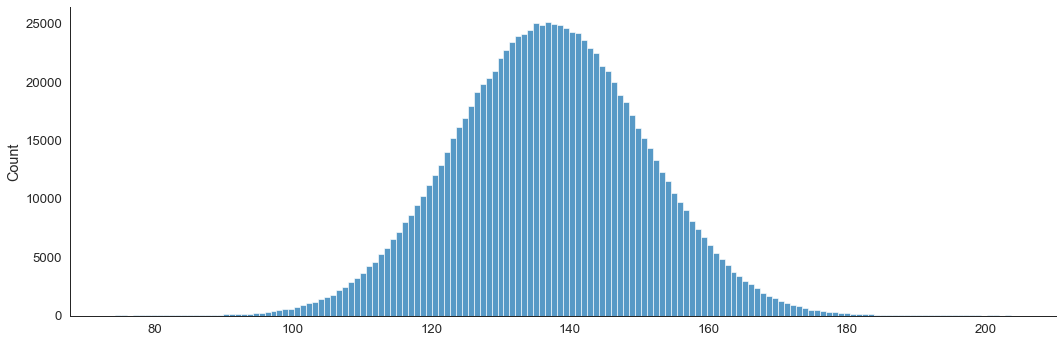

In [118]:
stab_batterie_2020 = batterie_2020 * 0.1

sim_batterie_2020  = np.random.normal(batterie_2020, stab_batterie_2020, 1_000_000)
df_sim_batterie_2020 = pd.DataFrame(sim_batterie_2020)
plot_distr(df_sim_batterie_2020, sim_batterie_2020)

#### Batteriekosten 2030 - Wahrscheinlichkeitsverteilung 

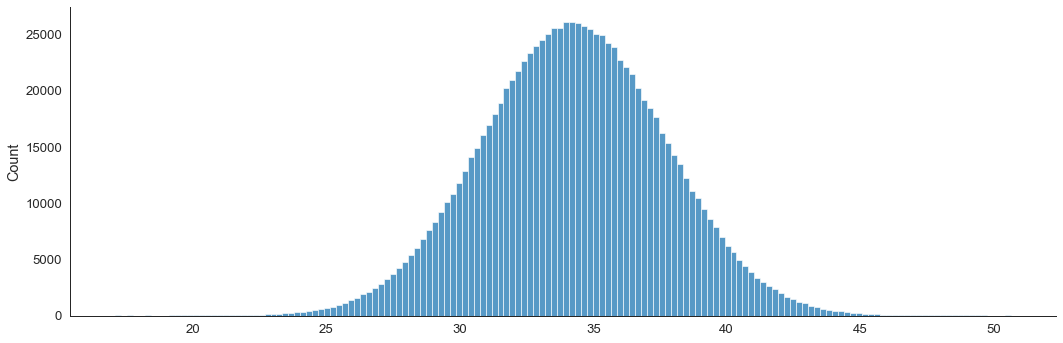

In [119]:
stab_batterie_2030 = batterie_2030 * 0.1

sim_batterie_2030  = np.random.normal(batterie_2030, stab_batterie_2030, 1_000_000)
df_sim_batterie_2030 = pd.DataFrame(sim_batterie_2030)
plot_distr(df_sim_batterie_2030, sim_batterie_2030)

### Subventionen
Die Subventionen sind kantonsbasiert. Wir haben herausgefunden, dass nicht jeder Kanton Subventionen anbietet. Beim Kauf eines Elektroautos werden die Subventionen bis zum Jahr 2030 bestimmt zunehmen. Die jährliche Steigung definierten wir bei 2%. 

Variationskoeffizient: 0.1

In [120]:
df_subventionen = pd.read_csv("Subventionen_Trend.csv")
df_subventionen

,Kanton,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Basel-Stadt,5000,5100,5202,5306,5412,5520,5631,5743,5858,5975
1,Wallis,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
2,Tessin,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
3,Genf,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
4,Thurgau,3000,3060,3121,3184,3247,3312,3378,3446,3515,3585
5,Schaffhausen,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
6,Waadt,1500,1530,1561,1592,1624,1656,1689,1723,1757,1793


In der obenstehenden Tabelle sieht man die 7 Kantone, welche stand 2021 Subventionen auf den Elektroautokauf anbieten.

Nun wollen wir das ganze noch grafisch darstellen.

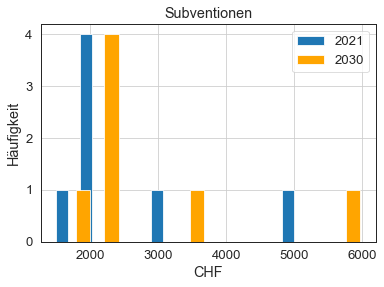

In [121]:
hist = df_subventionen["2021"].hist(bins=20, label="2021")
hist = df_subventionen["2030"].hist(bins=20, label="2030", color="orange")
hist = plt.title("Subventionen")
hist = plt.ylabel("Häufigkeit")
hist = plt.xlabel("CHF")
hist = plt.legend()

#### Subventionen 2021 - Wahrscheinlichkeitsverteilung 

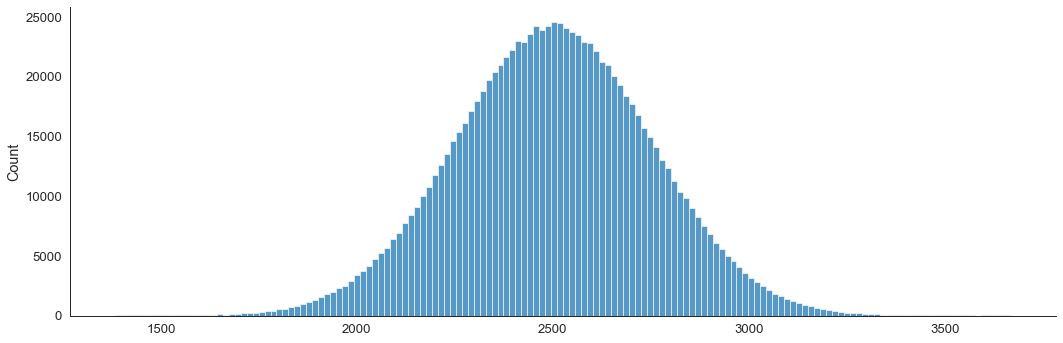

In [122]:
mu_subventionen_2021 = np.mean(df_subventionen["2021"])
stab_subventionen_2021 = mu_subventionen_2021 * 0.1

sim_subventionen_2021  = np.random.normal(mu_subventionen_2021, stab_subventionen_2021, 1_000_000)
df_sim_subventionen_2021 = pd.DataFrame(sim_subventionen_2021)
plot_distr(df_sim_subventionen_2021, sim_subventionen_2021)

#### Subventionen 2030 - Wahrscheinlichkeitsverteilung

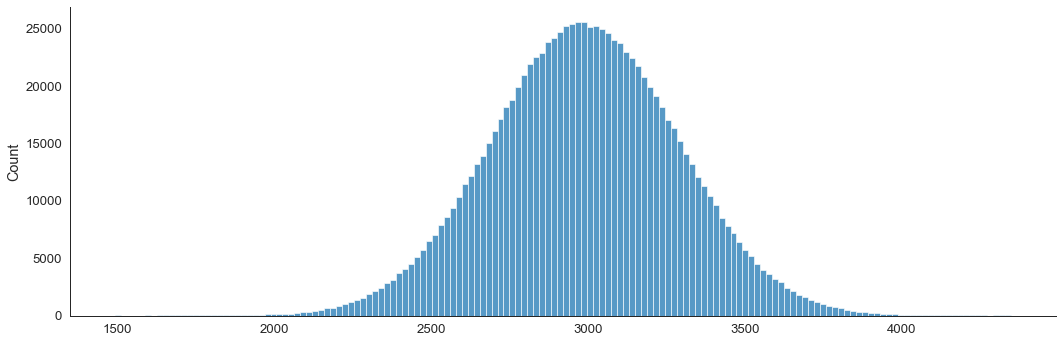

In [123]:
mu_subventionen_2030 = np.mean(df_subventionen["2030"])
stab_subventionen_2030 = mu_subventionen_2030 * 0.1

sim_subventionen_2030  = np.random.normal(mu_subventionen_2030, stab_subventionen_2030, 1_000_000)
df_sim_subventionen_2030 = pd.DataFrame(sim_subventionen_2030)
plot_distr(df_sim_subventionen_2030, sim_subventionen_2030)

### Kaufpreis (Händler)
Hier berechnen wir den Unterschied zwischen dem Kaufpreises eines Elektro- und Verbrennerauto. Bei den Elektroautos ziehen wir den Mittelwert der Subventionen ab und berücksichtigen, dass die Batterien immer günstiger werden.

#### Delta Kaufpreis 2021

In [115]:
mit_e_preis_2021 = mit_e_preis - mu_subventionen_2021
delta_auto_preis_2021 = mit_e_preis_2021 - mit_v_preis

print("Kaufpreis Elektroauto: CHF {}".format(mit_e_preis_2021))
print("Kaufpreis Verbrenner: CHF {}".format(mit_v_preis))
print("Preisunterschied effektiv: CHF {}".format(delta_auto_preis_2021))

Kaufpreis Elektroauto: CHF 42070.0
Kaufpreis Verbrenner: CHF 30231.25
Preisunterschied effektiv: CHF 11838.75


#### Delta Kaufpreis 2030

In [107]:
mit_e_preis_2030 = mit_e_preis - mu_subventionen_2030 - delta_batterie_preis
delta_auto_preis_2030 = mit_e_preis_2030 - mit_v_preis

print("Kaufpreis Elektroauto: CHF {}".format(mit_e_preis_2030))
print("Kaufpreis Verbrenner: CHF {}".format(mit_v_preis))
print("Preisunterschied effektiv: CHF {}".format(delta_auto_preis_2030))

Kaufpreis Elektroauto: CHF 35417.42857142857
Kaufpreis Verbrenner: CHF 30231.25
Preisunterschied effektiv: CHF 5186.1785714285725


#### Delta Kaufpreis 2021 - Wahrscheinlichkeitsverteilung

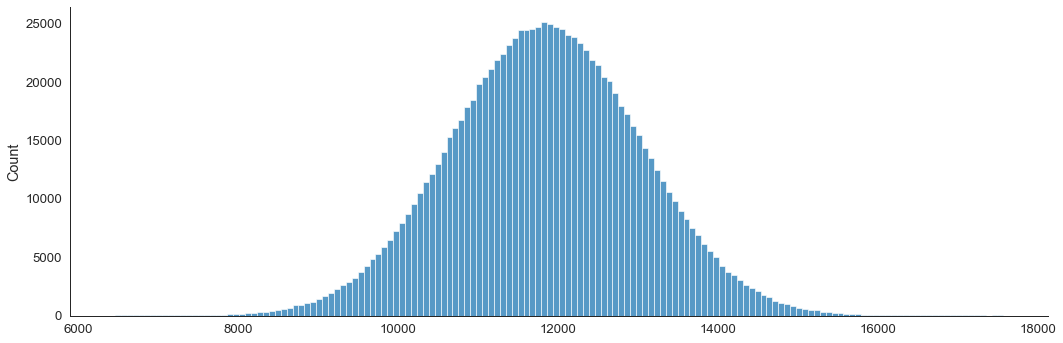

In [108]:
stab_auto_preis_2021 = delta_auto_preis_2021 * 0.1

sim_auto_preis_2021  = np.random.normal(delta_auto_preis_2021, stab_auto_preis_2021, 1_000_000)
df_sim_auto_preis_2021 = pd.DataFrame(sim_auto_preis_2021)
plot_distr(df_sim_auto_preis_2021, sim_auto_preis_2021)

#### Delta Kaufpreis 2030 - Wahrscheinlichkeitsverteilung

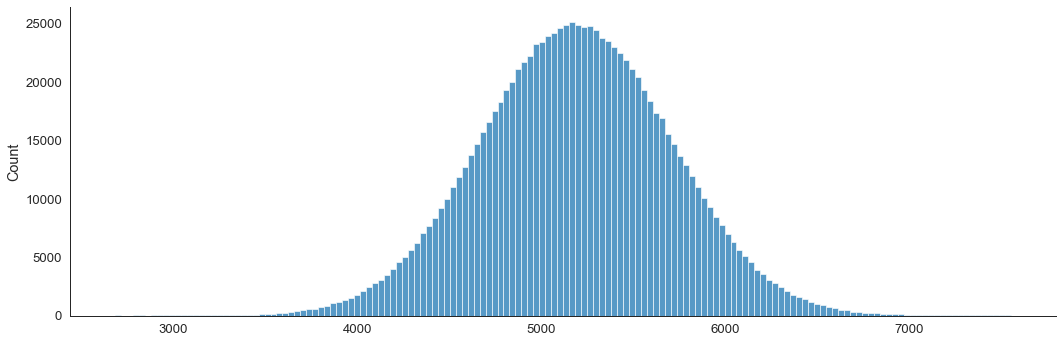

In [109]:
stab_auto_preis_20230 = delta_auto_preis_2030 * 0.1

sim_auto_preis_2030  = np.random.normal(delta_auto_preis_2030, stab_auto_preis_20230, 1_000_000)
df_sim_auto_preis_2030 = pd.DataFrame(sim_auto_preis_2030)
plot_distr(df_sim_auto_preis_2030, sim_auto_preis_2030)

### Kilometerpreis

In [110]:
def calc_delta_km(preis_kwh, preis_bleifrei):
    print("Preis pro 100km\nKWH:   CHF {}\nLiter: CHF {}\n".format(preis_kwh, preis_bleifrei))   
    return round(float((preis_bleifrei - preis_kwh) / 100),3)

#### Delta Kilometerpreis 2021
Verifox: Durchschnittlicher Verbrauch pro 100km im Jahr 2021 liegt bei 15KWH

Statista: Durchschnittlicher Verbrauch pro 100km im Jahr 2021 liegt bei 5.7 Liter

In [124]:
verbrauch_kwh_2021 = 15
kosten_kwh_2021 = df_antriebkosten["KWH"][11]
preis_kwh_2021 = verbrauch_kwh_2021 * kosten_kwh_2021

verbrauch_bleifrei_2021 = 5.7
kosten_bleifrei_2021 = df_antriebkosten["Bleifrei(95)"][11]
preis_bleifrei_2021 = verbrauch_bleifrei_2021 * kosten_bleifrei_2021

delta_km_preis_2021 = preis_bleifrei_2021 - preis_kwh_2021

print("Preis pro 100km kWh: CHF {}".format(preis_kwh_2021))
print("Preis pro 100km Liter: CHF {}".format(preis_bleifrei_2021))
print("Preisunterschied pro 100km: CHF {}".format(delta_km_preis_2021))

Preis pro 100km kWh: CHF 3.75
Preis pro 100km Liter: CHF 9.889500000000002
Preisunterschied pro 100km: CHF 6.139500000000002


#### Delta Kilometerpreis 2030
Verbrauch Benzin: 2030 sollen die Fahrzeuge im Durchschnitt noch 50% des Benzin- und Dieselverbrauchs pro 100 km aufweisen im Vergleich zu 2021.

- https://co2-gesetz-jetzt.ch/argumente/

Verbrauch KWH: 2030: 13 kWh / 100km
- Seite 11: https://www.ebp.ch/sites/default/files/2020-02/2020-03-02_EBP_CH_EmobSzen_PKW_2020_def.pdf

In [125]:
verbrauch_kwh_2030 = 13
kosten_kwh_2030 = df_antriebkosten_trend["KWH"].iloc[-1]
preis_kwh_2030 = verbrauch_kwh_2030 * kosten_kwh_2030

verbrauch_bleifrei_2030 = 2.9
kosten_bleifrei_2030 = df_antriebkosten["Bleifrei(95)"].iloc[-1]
preis_bleifrei_2030 = verbrauch_bleifrei_2030 * kosten_bleifrei_2030

delta_km_preis_2030 = calc_delta_km(preis_kwh_2030, preis_bleifrei_2030)
print("Preisunterschied pro 100km: CHF {}".format(delta_km_preis_2030))

Preis pro 100km
KWH:   CHF 3.3085
Liter: CHF 5.0315

Preisunterschied pro 100km: CHF 0.017


#### Delta Kilometerpreis 2021 - Wahrscheinlichkeitsverteilung 

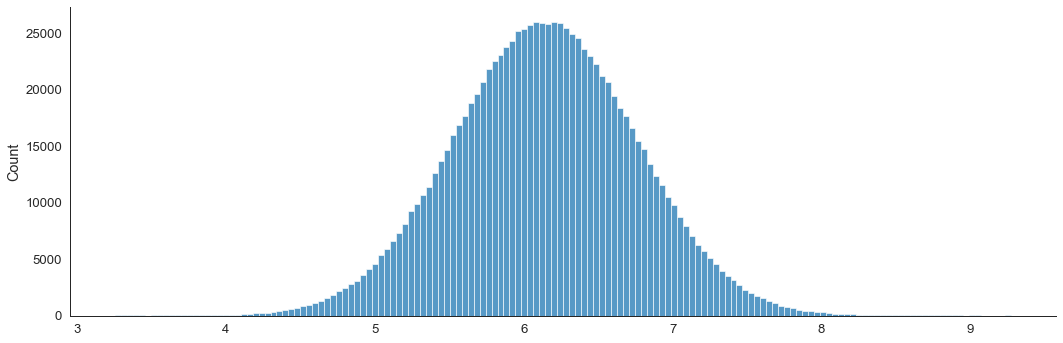

In [113]:
stab_km_preis_2021 = delta_km_preis_2021 * 0.1

sim_km_preis_2021  = np.random.normal(delta_km_preis_2021, stab_km_preis_2021, 1_000_000)
df_sim_km_preis_2021 = pd.DataFrame(sim_km_preis_2021)
plot_distr(df_sim_km_preis_2021, sim_km_preis_2021)

#### Delta Kilometerpreis 2030 - Wahrscheinlichkeitsverteilung 

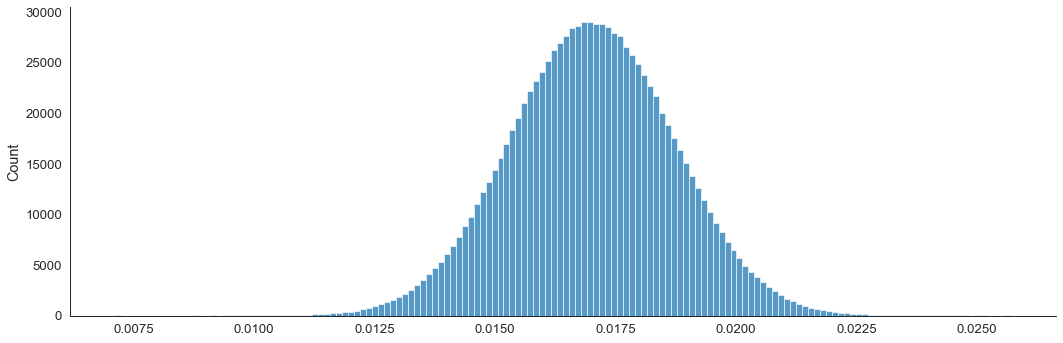

In [114]:
stab_km_preis_2030 = delta_km_preis_2030 * 0.1

sim_km_preis_2030  = np.random.normal(delta_km_preis_2030, stab_km_preis_2030, 1_000_000)
df_sim_km_preis_2030 = pd.DataFrame(sim_km_preis_2030)
plot_distr(df_sim_km_preis_2030, sim_km_preis_2030)

#### Delta Kimoleterpreis 2021 & 2030

In [44]:
delta_km_preis = delta_km_preis_2021 - delta_km_preis_2030
delta_km_preis_prozent = delta_km_preis_2030 * 100 / delta_km_preis_2021 - 100

print("Preisunterschied 2021 & 2030 in CHF: {}".format(delta_km_preis))
print("Preisunterschied 2021 & 2030 in %: {}".format(delta_km_preis_prozent))

Preisunterschied 2021 & 2030 in CHF: 0.044
Preisunterschied 2021 & 2030 in %: -72.1311475409836


### Kaufbereitschaft

Zuerst berechnen wir die Anzahl Menschen in den verschiedenen Altersgruppen anhand der Prozenten durch das Bundesamt für Statistik.
- 20-39 Jahre: 26.3%
- 40-64 Jahre: 35.0%
- 65 Jahre + : 18.8%

https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/stand-entwicklung/bevoelkerung.html

In [127]:
bevölkerung_schweiz = 8_700_000

# Bevölkerung nach alter berechnen
alter_20_39 = bevölkerung_schweiz * (26.3 / 100)
alter_40_64 = bevölkerung_schweiz * (35 / 100)
alter_65 = bevölkerung_schweiz * (18.8 / 100)

print("Anzahl Menschen zwischen 20 und 39: {}".format(alter_20_39))
print("Anzahl Menschen zwischen 40 und 64: {}".format(alter_40_64))
print("Anzahl Menschen über 65: {}".format(alter_65))

Anzahl Menschen zwischen 20 und 39: 2288100.0
Anzahl Menschen zwischen 40 und 64: 3045000.0
Anzahl Menschen über 65: 1635600.0


Um die heutige Kaufbereitschaft zu berechnen haben wir folgende Daten gesammtelt:

Kaufbereitschaft 2021 laut TCS: 
- 20-39 Jährige: 66%
- 40-64 Jährige: 59%
- 65+ Jährige: 44%

https://www.tcs.ch/de/der-tcs/presse/medienmitteilungen-2021/e-barometer-21.php

In [128]:
bevölkerung = alter_20_39 + alter_40_64 + alter_65

# Anzahl kaufbereite Menschen berechnen
kaufbereitschaft_alter_20_39 = alter_20_39 * (66 / 100)
kaufbereitschaft_alter_40_64 = alter_40_64 * (59 / 100)
kaufbereitschaft_alter_65 = alter_65 * (44 / 100)

bevölkerung_kaufbereitschaft = kaufbereitschaft_alter_20_39 + kaufbereitschaft_alter_40_64 + kaufbereitschaft_alter_65
print("Total Kaufbereit: {}".format(bevölkerung_kaufbereitschaft))

prozent_kaufbereitschaft = bevölkerung_kaufbereitschaft * 100 / bevölkerung
print("Prozent Kaufbereitschaft: {}".format(prozent_kaufbereitschaft))

Total Kaufbereit: 4026360.0
Prozent Kaufbereitschaft: 57.77777777777778


Anhand unseren Berechnungen konnten wir folgende Fakten feststellen:
- Die Reichweite ist stark gestiegen
- Die Antriebskosten (kWh) sind konstant geblieben
- Die Batteriepreise sind stark gesunken (Einfluss auf Kaufpreis)
- Der Unterschied des Kaufpreises zwischen Elektro- und Verbrennerautos ist konstant geblieben
- Der Kilometerpreis der Elektroautos ist etwas gesunken
- Die Subventionen auf Kauf sind gestiegen (Einfluss auf Kaufpreis)


Jetzt ist die Frage, wie diese Faktoren auf die Kaufbereitschaft Einfluss haben und wie sensitiv kaufbereite Leute reagieren. Wir definieren die wichtigsten Faktoren der Reihe nach:

1. Reichweite
2. Kaufpreis (Subventionen & Batteriepreise)
3. Kilometerpreis
4. Antriebskosten


Zudem müssen wir die Wahrscheinlichkeit herausfinden, ob eine kaufbereite Person (bei uns 57.8%) das Auto auch wirklich kauft. Durch langes Diskutieren haben wir angenommen, es handelt sich um 10%.

- R = delta Reichweite 2021 - 2030
- KP = delta Kaufpreis 2021 - 2030
- KMP = delta Kilometerpreis 2021 - 2030
- A = delta Antriebskosten 2021 - 2030

In [155]:
R = 1100 * delta_reichw
KP = 900 * delta_auto_preis_2030
KMP = 101 * delta_km_preis_2030
A = (-200) * delta_bleifrei_2030

reale_kaufbereitschaft = R + KP + KMP + A

anzahl_e_auto_2030 = reale_kaufbereitschaft * 0.1
print("Anzahl Elektroautos bis 2030: {}".format(anzahl_e_auto_2030))

Anzahl Elektroautos bis 2030: 524620.3431285716


### Anteil Elektroautos 2030